In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [307]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [308]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [309]:
train.shape

(8693, 14)

In [310]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [311]:
train.describe(include='O')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [312]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [313]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [314]:
test.shape

(4277, 13)

In [315]:
test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [316]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [317]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [318]:
transported = train[train['Transported'] == True]
not_transported = train[train['Transported'] == False]
print ("Transported: %i (%.1f%%)"%(len(transported), (len(transported))/len(train)*100.0))
print ("Not transported: %i (%.1f%%)"%(len(not_transported), (len(not_transported))/len(train)*100.0))
print ("Total: %i"%len(train))

Transported: 4378 (50.4%)
Not transported: 4315 (49.6%)
Total: 8693


In [319]:
train.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [320]:
train.groupby('Cabin').Transported.value_counts()

Cabin   Transported
A/0/P   False          1
        True           1
A/0/S   False          2
A/1/S   True           3
A/10/P  False          1
                      ..
T/0/P   False          1
T/1/P   False          1
T/2/P   False          1
T/2/S   False          1
T/3/P   True           1
Name: Transported, Length: 7169, dtype: int64

In [321]:
# train['Side'],train['Cabin number'],train['Deck'] = train.Cabin.str.split('/')
train['Side'] = train.Cabin.str[0]
train['Deck'] = train.Cabin.str[-1]
train
# train[['Cabin','Transported']].groupby('Cabin',as_index=False).mean()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Side,Deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S


In [322]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Side'] = le.fit_transform(train.Side)
train['Deck'] = le.fit_transform(train.Deck)

In [323]:
test['Side'] = test.Cabin.str[0]
test['Deck'] = test.Cabin.str[-1]
test['Side'] = le.fit_transform(test.Side)
test['Deck'] = le.fit_transform(test.Deck)
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Side,Deck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,6,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,5,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,2,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,6,1
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,8,2
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,3,0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,3,0


In [324]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [325]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [326]:
# train.HomePlanet.value_counts()
train_test_data = [train,test]
for dataset in train_test_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna('Earth')
    dataset['HomePlanet'] = le.fit_transform(dataset.HomePlanet)

In [327]:
for dataset in train_test_data:
    dataset.drop(['Name'],axis=1,inplace=True)
    dataset.drop(['Cabin'],axis=1,inplace=True)


In [328]:
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,0
8689,9278_01,0,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,6,1
8690,9279_01,0,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,6,1
8691,9280_01,1,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4,1


In [329]:
for dataset in train_test_data:
    dataset['CryoSleep'] = dataset['CryoSleep'].fillna(False)
    dataset['CryoSleep'] = le.fit_transform(dataset.CryoSleep)

In [330]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()

    age_null_random_list = np.random.randint(age_avg - age_std,age_avg+age_std,size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train['AgeBand'] = pd.cut(train['Age'],5)
print(train[['AgeBand','Transported']].groupby(['AgeBand'],as_index=False).mean())

          AgeBand  Transported
0  (-0.079, 15.8]     0.646918
1    (15.8, 31.6]     0.475654
2    (31.6, 47.4]     0.485058
3    (47.4, 63.2]     0.486747
4    (63.2, 79.0]     0.463235


C:\Users\Александр\AppData\Local\Temp\ipykernel_6924\986467251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [331]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [332]:
for dataset in train_test_data:
    dataset['RoomService'] = dataset['RoomService'].fillna(train['RoomService'].median())
    dataset['ShoppingMall'] = dataset['ShoppingMall'].fillna(train['ShoppingMall'].median())
    dataset['FoodCourt'] = dataset['FoodCourt'].fillna(train['FoodCourt'].median())
    dataset['Spa'] = dataset['Spa'].fillna(train['Spa'].median())
    dataset['VRDeck'] = dataset['VRDeck'].fillna(train['VRDeck'].median())

In [333]:
for dataset in train_test_data:
    dataset['VIP'] = dataset['VIP'].fillna(False)
    dataset['VIP'] = le.fit_transform(dataset.VIP)

In [334]:
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,AgeBand
0,0001_01,1,0,TRAPPIST-1e,2,0,0.0,0.0,0.0,0.0,0.0,False,1,0,"(31.6, 47.4]"
1,0002_01,0,0,TRAPPIST-1e,1,0,109.0,9.0,25.0,549.0,44.0,True,5,1,"(15.8, 31.6]"
2,0003_01,1,0,TRAPPIST-1e,3,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1,"(47.4, 63.2]"
3,0003_02,1,0,TRAPPIST-1e,2,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,"(31.6, 47.4]"
4,0004_01,0,0,TRAPPIST-1e,0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,"(15.8, 31.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,55 Cancri e,2,1,0.0,6819.0,0.0,1643.0,74.0,False,0,0,"(31.6, 47.4]"
8689,9278_01,0,1,PSO J318.5-22,1,0,0.0,0.0,0.0,0.0,0.0,False,6,1,"(15.8, 31.6]"
8690,9279_01,0,0,TRAPPIST-1e,1,0,0.0,0.0,1872.0,1.0,0.0,True,6,1,"(15.8, 31.6]"
8691,9280_01,1,0,55 Cancri e,1,0,0.0,1049.0,0.0,353.0,3235.0,False,4,1,"(31.6, 47.4]"


In [335]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Side              0
Deck              0
AgeBand           0
dtype: int64

In [336]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [337]:
for dataset in train_test_data:
    dataset['Destination'] = dataset['Destination'].fillna('TRAPPIST - 1e')
    dataset['Destination'] = le.fit_transform(dataset.Destination)

In [338]:
for dataset in train_test_data:
    dataset['Destination'] = le.fit_transform(dataset.Destination)

In [339]:
for dataset in train_test_data:
    room_avg = dataset['RoomService'].mean()
    room_std = dataset['RoomService'].std()
    room_null_count = dataset['RoomService'].isnull().sum()

    room_null_random_list = np.random.randint(room_avg - room_std, room_avg + room_std, size=room_null_count)
    dataset['RoomService'][np.isnan(dataset['RoomService'])] = room_null_random_list
    dataset['RoomService'] = dataset['RoomService'].astype(int)

train['RoomBand'] = pd.cut(train['RoomService'], 5)

print (train[['RoomBand', 'Transported']].groupby(['RoomBand'], as_index=False).mean())

             RoomBand  Transported
0   (-14.327, 2865.4]     0.508788
1    (2865.4, 5730.8]     0.085366
2    (5730.8, 8596.2]     0.000000
3   (8596.2, 11461.6]     0.000000
4  (11461.6, 14327.0]     0.000000


C:\Users\Александр\AppData\Local\Temp\ipykernel_6924\1260178758.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RoomService'][np.isnan(dataset['RoomService'])] = room_null_random_list


In [340]:
for dataset in train_test_data:
    dataset.loc[ dataset['RoomService'] <= 2865.4, 'RoomService'] = 0
    dataset.loc[(dataset['RoomService'] > 2865.4) & (dataset['RoomService'] <= 5730.8), 'RoomService'] = 1
    dataset.loc[(dataset['RoomService'] > 5730.8) & (dataset['RoomService'] <= 8596.2), 'RoomService'] = 2
    dataset.loc[(dataset['RoomService'] > 8596.2) & (dataset['RoomService'] <= 11461.6), 'RoomService'] = 3
    dataset.loc[ dataset['RoomService'] > 11461.8, 'RoomService'] = 4

train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,AgeBand,RoomBand
0,0001_01,1,0,3,2,0,0,0.0,0.0,0.0,0.0,False,1,0,"(31.6, 47.4]","(-14.327, 2865.4]"
1,0002_01,0,0,3,1,0,0,9.0,25.0,549.0,44.0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]"
2,0003_01,1,0,3,3,1,0,3576.0,0.0,6715.0,49.0,False,0,1,"(47.4, 63.2]","(-14.327, 2865.4]"
3,0003_02,1,0,3,2,0,0,1283.0,371.0,3329.0,193.0,False,0,1,"(31.6, 47.4]","(-14.327, 2865.4]"
4,0004_01,0,0,3,0,0,0,70.0,151.0,565.0,2.0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]"


In [341]:
for dataset in train_test_data:
    food_avg = dataset['FoodCourt'].mean()
    food_std = dataset['FoodCourt'].std()
    food_null_count = dataset['FoodCourt'].isnull().sum()

    food_null_random_list = np.random.randint(food_avg - food_std, food_avg + food_std, size=food_null_count)
    dataset['FoodCourt'][np.isnan(dataset['FoodCourt'])] = food_null_random_list
    dataset['FoodCourt'] = dataset['FoodCourt'].astype(int)

train['FoodBand'] = pd.cut(train['FoodCourt'], 5)
print(train)
print (train[['FoodCourt', 'Transported']].groupby(train['FoodBand'], as_index=False).mean())

     PassengerId  HomePlanet  CryoSleep  Destination  Age  VIP  RoomService  \
0        0001_01           1          0            3    2    0            0   
1        0002_01           0          0            3    1    0            0   
2        0003_01           1          0            3    3    1            0   
3        0003_02           1          0            3    2    0            0   
4        0004_01           0          0            3    0    0            0   
...          ...         ...        ...          ...  ...  ...          ...   
8688     9276_01           1          0            0    2    1            0   
8689     9278_01           0          1            1    1    0            0   
8690     9279_01           0          0            3    1    0            0   
8691     9280_01           1          0            0    1    0            0   
8692     9280_02           1          0            3    2    0            0   

      FoodCourt  ShoppingMall     Spa  VRDeck  Tran

C:\Users\Александр\AppData\Local\Temp\ipykernel_6924\2553197113.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['FoodCourt'][np.isnan(dataset['FoodCourt'])] = food_null_random_list


In [342]:
for dataset in train_test_data:
    dataset.loc[ dataset['FoodCourt'] <= 284.180414, 'FoodCourt'] = 0
    dataset.loc[(dataset['FoodCourt'] > 284.180414) & (dataset['FoodCourt'] <= 8197.964912), 'FoodCourt'] = 1
    dataset.loc[(dataset['FoodCourt'] > 8197.964912) & (dataset['FoodCourt'] <= 14511.583333), 'FoodCourt'] = 2
    dataset.loc[(dataset['FoodCourt'] > 14511.583333) & (dataset['FoodCourt'] <= 18851.500000), 'FoodCourt'] = 3
    dataset.loc[ dataset['FoodCourt'] > 18851.500000, 'FoodCourt'] = 4
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,AgeBand,RoomBand,FoodBand
0,0001_01,1,0,3,2,0,0,0,0.0,0.0,0.0,False,1,0,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]"
1,0002_01,0,0,3,1,0,0,0,25.0,549.0,44.0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]"
2,0003_01,1,0,3,3,1,0,1,0.0,6715.0,49.0,False,0,1,"(47.4, 63.2]","(-14.327, 2865.4]","(-29.813, 5962.6]"
3,0003_02,1,0,3,2,0,0,1,371.0,3329.0,193.0,False,0,1,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]"
4,0004_01,0,0,3,0,0,0,0,151.0,565.0,2.0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]"


In [343]:
for dataset in train_test_data:
    shop_avg = dataset['ShoppingMall'].mean()
    shop_std = dataset['ShoppingMall'].std()
    shop_null_count = dataset['ShoppingMall'].isnull().sum()

    shop_null_random_list = np.random.randint(shop_avg - shop_std, shop_avg + shop_std, size=shop_null_count)
    dataset['ShoppingMall'][np.isnan(dataset['ShoppingMall'])] = shop_null_random_list
    dataset['ShoppingMall'] = dataset['ShoppingMall'].astype(int)

train['ShopBand'] = pd.cut(train['ShoppingMall'], 5)

print (train[['ShoppingMall', 'Transported']].groupby(train['ShopBand'], as_index=False).mean())

   ShoppingMall  Transported
0    150.766463     0.502826
1   6106.777778     0.888889
2  11127.333333     0.333333
3           NaN          NaN
4  23492.000000     1.000000


C:\Users\Александр\AppData\Local\Temp\ipykernel_6924\2916727917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ShoppingMall'][np.isnan(dataset['ShoppingMall'])] = shop_null_random_list


In [344]:
for dataset in train_test_data:
    dataset.loc[ dataset['ShoppingMall'] <= 150.766463, 'ShoppingMall'] = 0
    dataset.loc[(dataset['ShoppingMall'] > 150.766463) & (dataset['ShoppingMall'] <= 6106.777778), 'ShoppingMall'] = 1
    dataset.loc[(dataset['ShoppingMall'] > 6106.777778) & (dataset['ShoppingMall'] <= 11127.333333), 'ShoppingMall'] = 2
    dataset.loc[(dataset['ShoppingMall'] > 11127.333333), 'ShoppingMall'] = 3
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,AgeBand,RoomBand,FoodBand,ShopBand
0,0001_01,1,0,3,2,0,0,0,0,0.0,0.0,False,1,0,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]"
1,0002_01,0,0,3,1,0,0,0,0,549.0,44.0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]"
2,0003_01,1,0,3,3,1,0,1,0,6715.0,49.0,False,0,1,"(47.4, 63.2]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]"
3,0003_02,1,0,3,2,0,0,1,1,3329.0,193.0,False,0,1,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]"
4,0004_01,0,0,3,0,0,0,0,1,565.0,2.0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]"


In [345]:
for dataset in train_test_data:
    spa_avg = dataset['Spa'].mean()
    spa_std = dataset['Spa'].std()
    spa_null_count = dataset['Spa'].isnull().sum()

    spa_null_random_list = np.random.randint(spa_avg - spa_std, spa_avg + spa_std, size=spa_null_count)
    dataset['Spa'][np.isnan(dataset['Spa'])] = spa_null_random_list
    dataset['Spa'] = dataset['Spa'].astype(int)

train['SpaBand'] = pd.cut(train['Spa'], 5)

print (train[['Spa', 'Transported']].groupby(train['SpaBand'], as_index=False).mean())

            Spa  Transported
0    197.351698     0.511031
1   5948.863158     0.000000
2  10914.380952     0.000000
3  15219.375000     0.000000
4  20490.000000     0.000000


C:\Users\Александр\AppData\Local\Temp\ipykernel_6924\3256417486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Spa'][np.isnan(dataset['Spa'])] = spa_null_random_list


In [346]:
for dataset in train_test_data:
    dataset.loc[ dataset['Spa'] <= 197.351698, 'Spa'] = 0
    dataset.loc[(dataset['Spa'] > 197.351698) & (dataset['Spa'] <= 5948.863158), 'Spa'] = 1
    dataset.loc[(dataset['Spa'] > 5948.863158) & (dataset['Spa'] <= 10914.380952), 'Spa'] = 2
    dataset.loc[(dataset['Spa'] > 10914.380952) & (dataset['Spa'] <= 15219.375000), 'Spa'] = 3
    dataset.loc[ dataset['Spa'] > 15219.375000, 'Spa'] = 4
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,AgeBand,RoomBand,FoodBand,ShopBand,SpaBand
0,0001_01,1,0,3,2,0,0,0,0,0,0.0,False,1,0,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]"
1,0002_01,0,0,3,1,0,0,0,0,1,44.0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]"
2,0003_01,1,0,3,3,1,0,1,0,2,49.0,False,0,1,"(47.4, 63.2]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(4481.6, 8963.2]"
3,0003_02,1,0,3,2,0,0,1,1,1,193.0,False,0,1,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]"
4,0004_01,0,0,3,0,0,0,0,1,1,2.0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]"


In [347]:
for dataset in train_test_data:
    vr_avg = dataset['VRDeck'].mean()
    vr_std = dataset['VRDeck'].std()
    vr_null_count = dataset['VRDeck'].isnull().sum()

    vr_null_random_list = np.random.randint(vr_avg - vr_std, vr_avg + vr_std, size=vr_null_count)
    dataset['VRDeck'][np.isnan(dataset['VRDeck'])] = vr_null_random_list
    dataset['VRDeck'] = dataset['VRDeck'].astype(int)

train['VRBand'] = pd.cut(train['VRDeck'], 5)

print (train[['VRDeck', 'Transported']].groupby(train['VRBand'], as_index=False).mean())

         VRDeck  Transported
0    191.894590     0.510378
1   6478.813953     0.011628
2  11210.120000     0.000000
3  16300.500000     0.000000
4  22234.500000     0.000000


C:\Users\Александр\AppData\Local\Temp\ipykernel_6924\3391351363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['VRDeck'][np.isnan(dataset['VRDeck'])] = vr_null_random_list


In [348]:
for dataset in train_test_data:
    dataset.loc[ dataset['VRDeck'] <= 191.894590, 'VRDeck'] = 0
    dataset.loc[(dataset['VRDeck'] > 191.894590) & (dataset['VRDeck'] <= 6478.813953), 'VRDeck'] = 1
    dataset.loc[(dataset['VRDeck'] > 6478.813953) & (dataset['VRDeck'] <= 11210.120000), 'VRDeck'] = 2
    dataset.loc[(dataset['VRDeck'] > 11210.120000) & (dataset['VRDeck'] <= 16300.500000), 'VRDeck'] = 3
    dataset.loc[ dataset['VRDeck'] > 16300.500000, 'VRDeck'] = 4
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,AgeBand,RoomBand,FoodBand,ShopBand,SpaBand,VRBand
0,0001_01,1,0,3,2,0,0,0,0,0,0,False,1,0,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"
1,0002_01,0,0,3,1,0,0,0,0,1,0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"
2,0003_01,1,0,3,3,1,0,1,0,2,0,False,0,1,"(47.4, 63.2]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(4481.6, 8963.2]","(-24.133, 4826.6]"
3,0003_02,1,0,3,2,0,0,1,1,1,1,False,0,1,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"
4,0004_01,0,0,3,0,0,0,0,1,1,0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"


In [349]:
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,AgeBand,RoomBand,FoodBand,ShopBand,SpaBand,VRBand
0,0001_01,1,0,3,2,0,0,0,0,0,0,False,1,0,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"
1,0002_01,0,0,3,1,0,0,0,0,1,0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"
2,0003_01,1,0,3,3,1,0,1,0,2,0,False,0,1,"(47.4, 63.2]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(4481.6, 8963.2]","(-24.133, 4826.6]"
3,0003_02,1,0,3,2,0,0,1,1,1,1,False,0,1,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"
4,0004_01,0,0,3,0,0,0,0,1,1,0,True,5,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,2,1,0,1,0,1,0,False,0,0,"(31.6, 47.4]","(-14.327, 2865.4]","(5962.6, 11925.2]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"
8689,9278_01,0,1,1,1,0,0,0,0,0,0,False,6,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"
8690,9279_01,0,0,3,1,0,0,0,1,0,0,True,6,1,"(15.8, 31.6]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"
8691,9280_01,1,0,0,1,0,0,1,0,1,1,False,4,1,"(31.6, 47.4]","(-14.327, 2865.4]","(-29.813, 5962.6]","(-23.492, 4698.4]","(-22.408, 4481.6]","(-24.133, 4826.6]"


In [350]:
train['Transported'] = train['Transported'].astype(int)

In [351]:
for dataset in [train]:
    dataset.drop(['PassengerId'],axis=1,inplace=True)
    dataset.drop(['AgeBand'],axis=1,inplace=True)
    dataset.drop(['RoomBand'],axis=1,inplace=True)
    dataset.drop(['FoodBand'],axis=1,inplace=True)
    dataset.drop(['ShopBand'],axis=1,inplace=True)
    dataset.drop(['SpaBand'],axis=1,inplace=True)
    dataset.drop(['VRBand'],axis=1,inplace=True)

In [352]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck
0,1,0,3,2,0,0,0,0,0,0,0,1,0
1,0,0,3,1,0,0,0,0,1,0,1,5,1
2,1,0,3,3,1,0,1,0,2,0,0,0,1
3,1,0,3,2,0,0,1,1,1,1,0,0,1
4,0,0,3,0,0,0,0,1,1,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,2,1,0,1,0,1,0,0,0,0
8689,0,1,1,1,0,0,0,0,0,0,0,6,1
8690,0,0,3,1,0,0,0,1,0,0,1,6,1
8691,1,0,0,1,0,0,1,0,1,1,0,4,1


In [353]:
X_train = train.drop('Transported', axis=1)
y_train = train['Transported']


X_train.shape, y_train.shape

((8693, 12), (8693,))

In [354]:
test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side,Deck
0,0013_01,0,1,3,1,0,0,0,0,0,0,6,1
1,0018_01,0,0,3,1,0,0,0,0,1,0,5,1
2,0019_01,1,1,0,1,0,0,0,0,0,0,2,1
3,0021_01,1,0,3,2,0,0,1,0,0,1,2,1
4,0023_01,0,0,3,1,0,0,0,1,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,1,3,2,0,0,0,0,0,0,6,1
4273,9269_01,0,0,3,2,0,0,1,0,0,0,8,2
4274,9271_01,2,1,0,0,0,0,0,0,0,0,3,0
4275,9273_01,1,0,2,2,0,0,1,0,0,1,3,0


In [355]:
X_test = test.drop('PassengerId',axis = 1)
test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side,Deck
0,0013_01,0,1,3,1,0,0,0,0,0,0,6,1
1,0018_01,0,0,3,1,0,0,0,0,1,0,5,1
2,0019_01,1,1,0,1,0,0,0,0,0,0,2,1
3,0021_01,1,0,3,2,0,0,1,0,0,1,2,1
4,0023_01,0,0,3,1,0,0,0,1,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,1,3,2,0,0,0,0,0,0,6,1
4273,9269_01,0,0,3,2,0,0,1,0,0,0,8,2
4274,9271_01,2,1,0,0,0,0,0,0,0,0,3,0
4275,9273_01,1,0,2,2,0,0,1,0,0,1,3,0


In [356]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [357]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

74.95


In [358]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

74.9


C:\Users\Александр\Desktop\ML\env\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [359]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

77.06


In [360]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

82.24


In [361]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

82.24


In [362]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

69.85


In [363]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

73.69


In [364]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

66.73


In [365]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_score = round(gbc.score(X_train, y_train), 5)
gbc_score

0.77568

Accuracy: 82 % 



<AxesSubplot: >

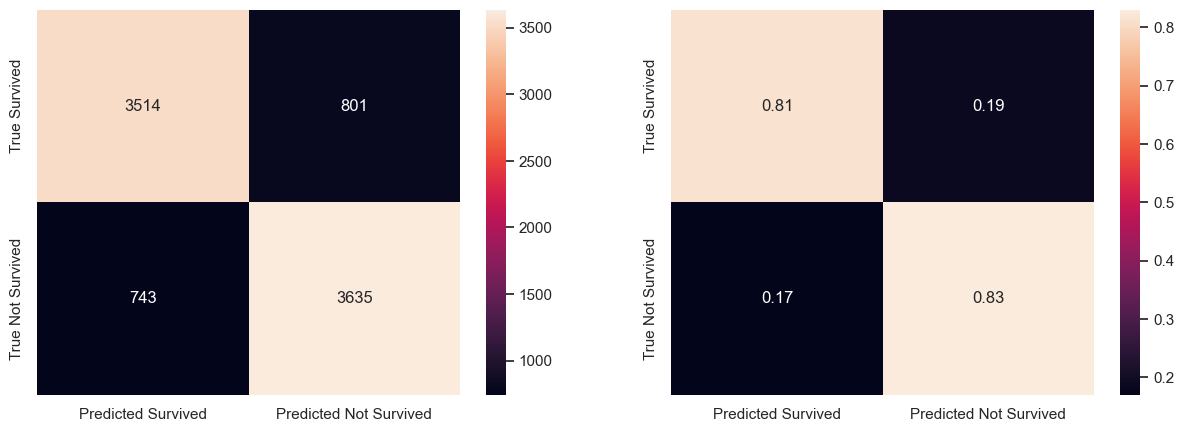

In [366]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

Accuracy: 73 % 



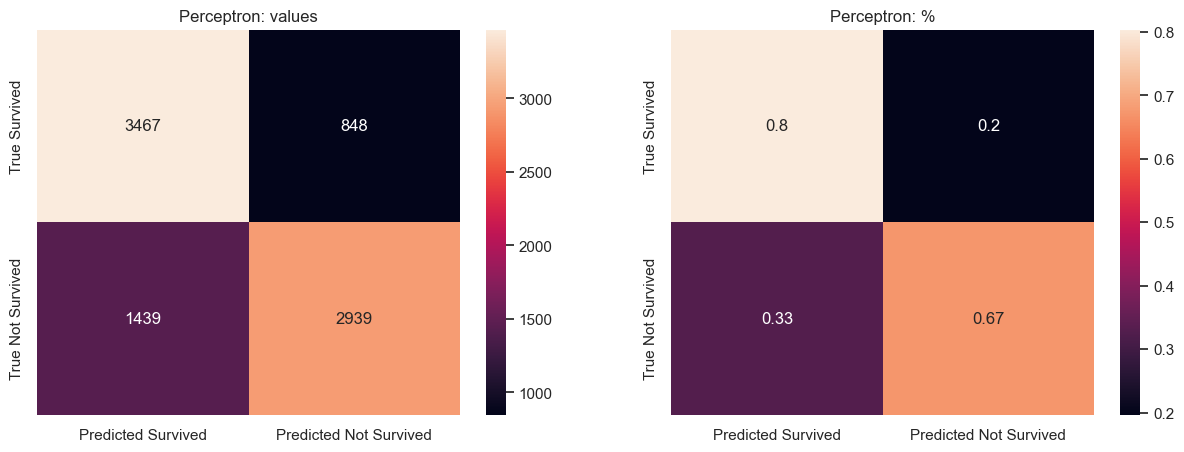

In [367]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_train)

acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_perceptron)

#class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_perceptron)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

#true_class_names = ['True Survived', 'True Not Survived']
#predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

ax1 = plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')
ax1.title.set_text('Perceptron: values')

ax2 = plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)
ax2.title.set_text('Perceptron: %')

Accuracy: 73 % 



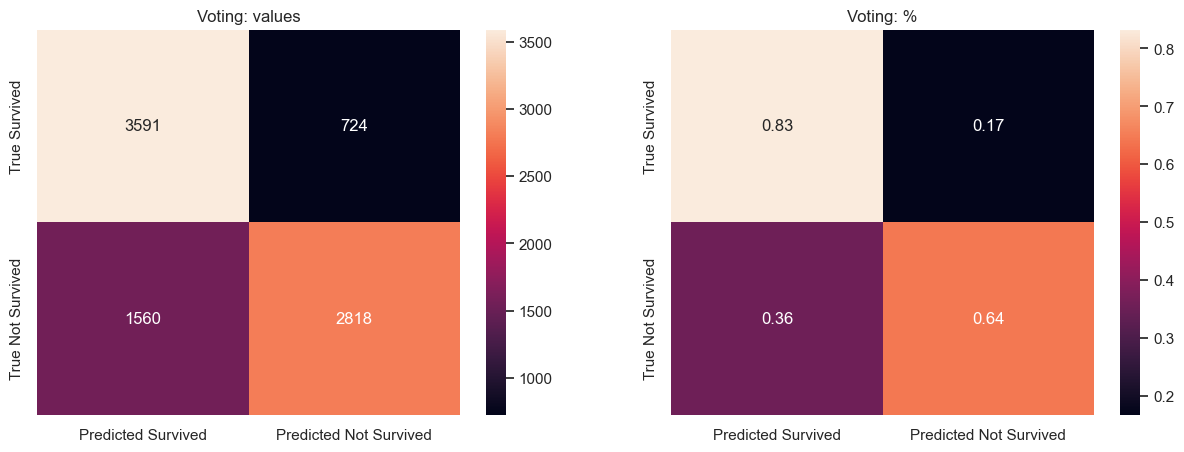

In [368]:
from sklearn.ensemble import VotingClassifier

# 1. Dыбираем модели, включенные в голосование
model1 = Perceptron(max_iter=5, tol=None)
model2 = SGDClassifier(max_iter=5, tol=None)
model3 = GaussianNB()

# 2. Сам "голосующий" классификатор
model = VotingClassifier(estimators=[('perceptron', model1), ('sdg', model2), ('nb', model3)], voting='hard')
model.fit(X_train,y_train)

# 3. Confusion Matrix
y_pred_voter = model.predict(X_train)
acc_voter = round(model.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_voter)

#class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_voter)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

#true_class_names = ['True Survived', 'True Not Survived']
#predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

ax1 = plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')
ax1.title.set_text('Voting: values')

ax2 = plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)
ax2.title.set_text('Voting: %')

In [369]:
test.head()
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Transported": gbc.predict(X_test)
})
sample = pd.read_csv('sample_submission.csv')
sample.Transported = gbc.predict(X_test)
sample.loc[sample['Transported'] == 1,'Transported'] = True
sample.loc[sample['Transported'] == 0,'Transported'] = False
sample.to_csv('asdcadcasdc.csv',index=False)